<a href="https://colab.research.google.com/github/pavithranair/Genome-Polymorphism-Detection/blob/main/DeBrjujin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gvmagic

  Created wheel for gvmagic: filename=gvmagic-0.5-py3-none-any.whl size=10470 sha256=4bf8211312d325113e9af1a675c1d9e99fa266aab4e47a720018bdb74edae2c5
  Stored in directory: /root/.cache/pip/wheels/e5/ad/b2/2ba1aaaf5b2004d96473291c80f98d4524a01c6d6e9d468172
Successfully built gvmagic


In [107]:
import networkx as nx
import matplotlib.pyplot as plt
import gvmagic
    
def prefix(kmer):
    n = len(kmer)
    return kmer[0:n-1]

def suffix(kmer):
    n = len(kmer)
    return kmer[1:n]

def kmer_composition(seq, k):
    kmers = []
    for i in range(len(seq)-k+1):
        kmers.append(seq[i:i+k])
    return kmers

def reverse_lookup(rlookup, lidx, ridx):
    key_list = list(rlookup.keys())
    val_list = list(rlookup.values())
    position = val_list.index(lidx)
    lPos = key_list[position]
    position = val_list.index(ridx)
    rPos = key_list[position]
    return lPos, rPos

def visualize_debruijn(g):
    nodes = set()
    for elem in list(g.nodes(data=True)):
        nodes.add(elem[0])
    edges = list(g.edges())
    dot_str= 'digraph "DeBruijn graph" {\n '
    for node in nodes:
        dot_str += '    %s [label="%s"] ;\n' %(node,node)
    for src,dst in edges:
        dot_str += '    %s->%s;\n' %(src,dst)
    return dot_str + '}\n'

def CONSTRUCT(seq, k):
    occs = {}
    curidx = 0
    g = nx.DiGraph()
    rlookup = {}
    kmers = kmer_composition(seq, k)
    for kmer in kmers:
        l = prefix(kmer)
        if l not in occs.keys():
            occs[l] = 0
            rlookup[l] = 0
        lidx = curidx
        curidx += 1
        occs[l] = occs[l] + 1
        rlookup[l] = lidx
        r = suffix(kmer)
        if r not in occs.keys():
            occs[r] = 0
            rlookup[r] = 0
        ridx = curidx
        curidx += 1
        occs[r] += 1
        rlookup[r] = ridx
        lPos, rPos = reverse_lookup(rlookup, lidx, ridx)
        g.add_edge(lPos, rPos)
    return occs, curidx, g, rlookup

def APPEND(g, occs, curidx, seq, k, rlookup):
    kmers = kmer_composition(seq, k)
    for kmer in kmers:
        l = prefix(kmer)
        if l not in occs.keys():
            occs[l] = 0
        if occs[l] > 0:
            lidx = rlookup[l]
        else:
            lidx = curidx
            curidx += 1
        r = suffix(kmer)
        if r not in occs.keys():
            occs[r] = 0
        if occs[r] > 0:
            ridx = rlookup[r]
        else:
            ridx = curidx
            curidx += 1
        lPos, rPos = reverse_lookup(rlookup, lidx, ridx)
        g.add_edge(lPos, rPos)


seq1 = "ACTTACGTACTTG"

occs, curidx, g, rlookup = CONSTRUCT(seq1, 5)

In [108]:
get_ipython().magic(u'load_ext gvmagic')

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


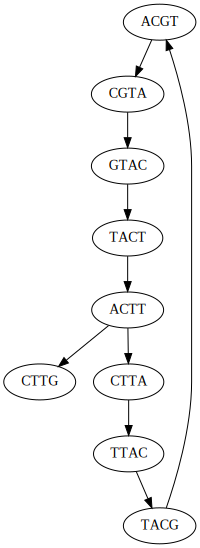

In [109]:
get_ipython().magic(u'dotstr visualize_debruijn(g)')

In [110]:
seq2 = "ACTTACTTACT"
APPEND(g, occs, curidx, seq2, 5, rlookup)

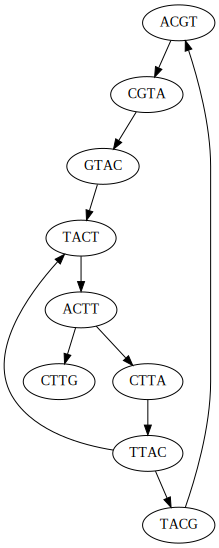

In [111]:
get_ipython().magic(u'dotstr visualize_debruijn(g)')